# EDA of E-Commerce Reviews

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import cufflinks as cf
import plotly as py
from plotly.offline import iplot

cf.go_offline()

def enable_plotly_in_cell():
    import IPython
    from plotly.offline import init_notebook_mode
    display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
    py.offline.init_notebook_mode(connected=True)
 

In [113]:
df=pd.read_csv('Womens Clothing E-Commerce Reviews.csv',index_col=0)
df.head()

Clothing ID  Age  ... Department Name Class Name
0          767   33  ...        Intimate  Intimates
1         1080   34  ...         Dresses    Dresses
2         1077   60  ...         Dresses    Dresses
3         1049   50  ...         Bottoms      Pants
4          847   47  ...            Tops    Blouses

[5 rows x 10 columns]

In [114]:
df.drop(labels=['Title','Clothing ID'],axis=1,inplace=True)
df.head()

Age  ... Class Name
0   33  ...  Intimates
1   34  ...    Dresses
2   60  ...    Dresses
3   50  ...      Pants
4   47  ...    Blouses

[5 rows x 8 columns]

In [115]:
df.isnull().sum()

Age                          0
Review Text                845
Rating                       0
Recommended IND              0
Positive Feedback Count      0
Division Name               14
Department Name             14
Class Name                  14
dtype: int64

In [116]:
df.dropna(subset=['Review Text', 'Division Name'], inplace = True)
df.head()

Age  ... Class Name
0   33  ...  Intimates
1   34  ...    Dresses
2   60  ...    Dresses
3   50  ...      Pants
4   47  ...    Blouses

[5 rows x 8 columns]

In [117]:
df.isnull().sum()

Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [0]:
' '.join(df['Review Text'].tolist())

In [0]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and "}

In [0]:
def cont_to_exp(x):
    if type(x) is str:
        x = x.replace('\\', '')
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [121]:
# check working
x = "i don't know what date is today, I am 5'8\"" 
print(cont_to_exp(x))

i do not know what date is today, I am 5'8"


In [0]:
df['Review Text'] = df['Review Text'].apply(lambda x: cont_to_exp(x))

In [123]:
df



Age  ... Class Name
0       33  ...  Intimates
1       34  ...    Dresses
2       60  ...    Dresses
3       50  ...      Pants
4       47  ...    Blouses
...    ...  ...        ...
23481   34  ...    Dresses
23482   48  ...      Knits
23483   31  ...    Dresses
23484   28  ...    Dresses
23485   52  ...    Dresses

[22628 rows x 8 columns]

In [0]:
print(' '.join(df['Review Text'].tolist())[:1000])

## Feature Engineering

In [0]:
from textblob import TextBlob

In [0]:
df['polarity'] = df['Review Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [0]:
df['review_len'] = df['Review Text'].apply(lambda x: len(x))

In [0]:
df['word_count'] = df['Review Text'].apply(lambda x: len(x.split()))

In [0]:
def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
        
    return word_len/len(words)

In [0]:
df['avg_word_len'] = df['Review Text'].apply(lambda x: get_avg_word_len(x))

In [131]:
df.head()

Age  ... avg_word_len
0   33  ...     5.750000
1   34  ...     3.646154
2   60  ...     4.112245
3   50  ...     4.478261
4   47  ...     4.361111

[5 rows x 12 columns]

## Sentiment Polarity Distribution

In [0]:
# !pip install chart_studio

In [133]:
enable_plotly_in_cell()

df['polarity'].iplot(kind = 'hist', colors = 'red', bins = 50,xTitle = 'Polarity',
                      yTitle = 'Count', title  = 'Sentiment Polarity Distribution')

## Distribution of Department,Division,Reviews Rating,Reviewers and Class

In [134]:
df['Department Name'].value_counts()

Tops        10048
Dresses      6145
Bottoms      3662
Intimate     1653
Jackets      1002
Trend         118
Name: Department Name, dtype: int64

In [135]:
df.groupby('Department Name').count()

Age  Review Text  ...  word_count  avg_word_len
Department Name                      ...                          
Bottoms           3662         3662  ...        3662          3662
Dresses           6145         6145  ...        6145          6145
Intimate          1653         1653  ...        1653          1653
Jackets           1002         1002  ...        1002          1002
Tops             10048        10048  ...       10048         10048
Trend              118          118  ...         118           118

[6 rows x 11 columns]

In [136]:
enable_plotly_in_cell()

df['Department Name'].value_counts().iplot(kind = 'bar', yTitle = 'Count', xTitle = 'Department',
                                          title = "Bar Chart of Department's Name")

In [137]:
enable_plotly_in_cell()

df['Division Name'].value_counts().iplot(kind = 'bar', yTitle = 'Count', xTitle = 'Division',
                                          title = "Bar Chart of Division's Name")


In [138]:
enable_plotly_in_cell()
df['Class Name'].value_counts().iplot(kind = 'bar', yTitle = 'Count', xTitle = 'Class',
                                          title = "Bar Chart of Class's Name")


In [139]:
enable_plotly_in_cell()

df['Rating'].iplot(kind = 'hist', xTitle = 'Rating', yTitle = 'Count',
                  title = 'Review Rating Distribution')

In [140]:
enable_plotly_in_cell()
df['Age'].iplot(kind = 'hist', bins = 40, xTitle = 'Age', yTitle = 'Count',
               title = 'Reviewers Age Dist', colors = 'orange', linecolor = 'gray')

## Unigram,Bigram and Trigram Distribution

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
#Example:

# x = 'this is a test example'

# unigram = this, is, a, test, example
# bigram = this is, is a, a test, test example
# trigram = this is a, is a test, a test example

#### Unigram

In [0]:
def get_top_n_words(x, n):
    vec = CountVectorizer().fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

In [0]:
words = get_top_n_words(df['Review Text'], 20)

In [145]:
enable_plotly_in_cell()
df1 = pd.DataFrame(words, columns = ['Unigram', 'Frequency'])
df1 = df1.set_index('Unigram')
df1.iplot(kind = 'bar', xTitle = 'Unigram', yTitle = 'Count', title = ' Top 20 unigram words')

#### Bigram

In [0]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

In [0]:
words = get_top_n_words(df['Review Text'], 20)

In [148]:
enable_plotly_in_cell()
df1 = pd.DataFrame(words, columns = ['Bigram', 'Frequency'])
df1 = df1.set_index('Bigram')
df1.iplot(kind = 'bar', xTitle = 'Bigram', yTitle = 'Count', title = ' Top 20 Bigram words')

#### Trigram

In [0]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

In [0]:
words = get_top_n_words(df['Review Text'], 20)

In [151]:
enable_plotly_in_cell()
df1 = pd.DataFrame(words, columns = ['Trigram', 'Frequency'])
df1 = df1.set_index('Trigram')
df1.iplot(kind = 'bar', xTitle = 'Trigram', yTitle = 'Count', title = ' Top 20 Trigram words')

## Distribution of Above with StopWords

In [0]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(1, 1), stop_words='english').fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

In [153]:
words = get_top_n_words(df['Review Text'], 20)
enable_plotly_in_cell()
df1 = pd.DataFrame(words, columns = ['Unigram', 'Frequency'])
df1 = df1.set_index('Unigram')
df1.iplot(kind = 'bar', xTitle = 'Unigram', yTitle = 'Count', title = ' Top 20 Unigram words')

In [0]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

In [155]:
words = get_top_n_words(df['Review Text'], 20)
enable_plotly_in_cell()
df1 = pd.DataFrame(words, columns = ['Bigram', 'Frequency'])
df1 = df1.set_index('Bigram')
df1.iplot(kind = 'bar', xTitle = 'Bigram', yTitle = 'Count', title = ' Top 20 Bigram words')

In [0]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

In [157]:
words = get_top_n_words(df['Review Text'], 20)
enable_plotly_in_cell()
df1 = pd.DataFrame(words, columns = ['Trigram', 'Frequency'])
df1 = df1.set_index('Trigram')
df1.iplot(kind = 'bar', xTitle = 'Trigram', yTitle = 'Count', title = ' Top 20 Trigram words')

## Distribution of Top20 POS tags

In [0]:
# !pip install nltk

In [0]:
import nltk

In [160]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [0]:
blob = TextBlob(str(df['Review Text']))

In [162]:
pos_df = pd.DataFrame(blob.tags, columns = ['words', 'pos'])
pos_df = pos_df['pos'].value_counts()
pos_df

NN     23
DT     15
JJ     13
CD     11
PRP     8
RB      6
VBP     5
VBZ     5
IN      5
CC      4
VBD     4
NNP     4
TO      3
VB      2
NNS     2
PDT     1
Name: pos, dtype: int64

In [163]:
enable_plotly_in_cell()
pos_df.iplot(kind = 'bar')

## Bivariate Analysis

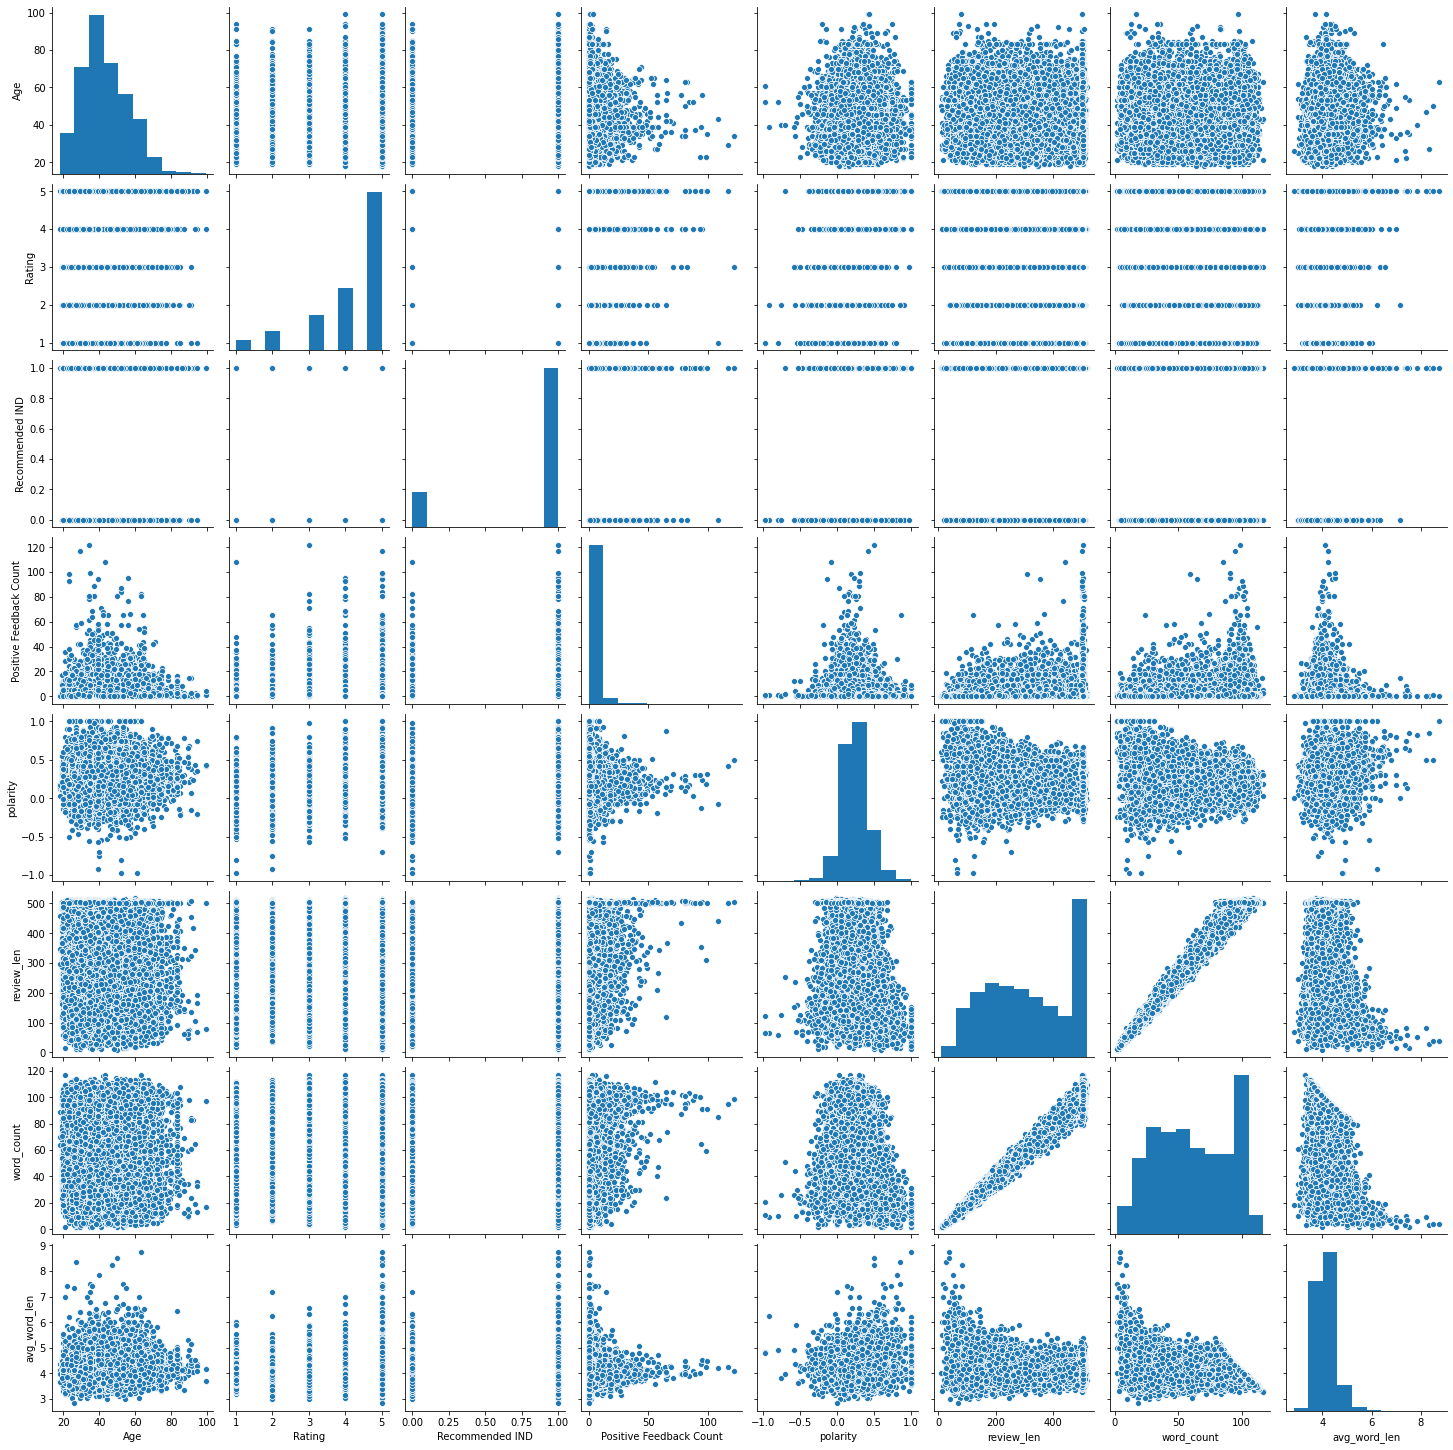

In [164]:
sns.pairplot(df)

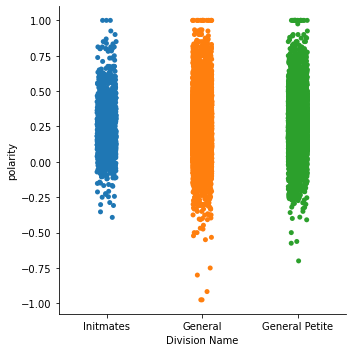

In [165]:
sns.catplot(x = 'Division Name', y = 'polarity', data = df)

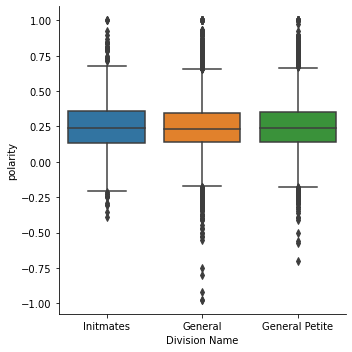

In [166]:
sns.catplot(x = 'Division Name', y = 'polarity', data = df, kind = 'box')

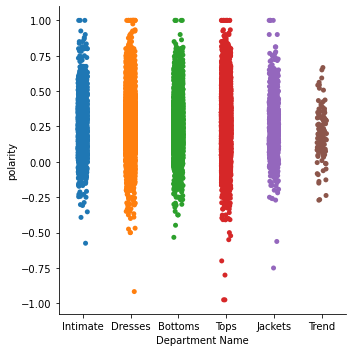

In [167]:
sns.catplot(x = 'Department Name', y = 'polarity', data = df)

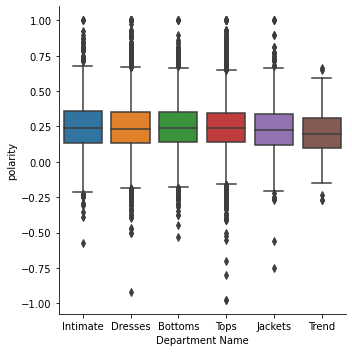

In [168]:
sns.catplot(x = 'Department Name', y = 'polarity', data = df, kind = 'box')

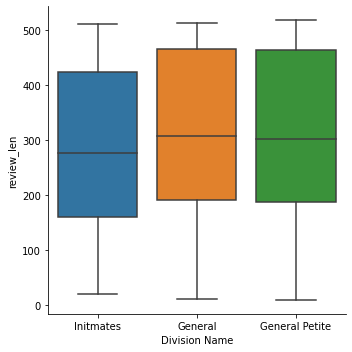

In [169]:
sns.catplot(x = 'Division Name', y = 'review_len', data = df, kind = 'box')

## Distribution of Sentiment Polarity of Reviews based on recommendation

In [0]:
import plotly.express as px
import plotly.graph_objects as go

In [0]:
x1 = df[df['Recommended IND']==1]['polarity']
x0 = df[df['Recommended IND']==0]['polarity']

In [0]:
trace0 = go.Histogram(x = x0, name = 'Not Recommended', opacity = 0.7)
trace1 = go.Histogram(x = x1, name = 'Recommended', opacity = 0.7)

In [173]:
data = [trace0, trace1]
enable_plotly_in_cell()
layout = go.Layout(barmode = 'overlay', title = 'Distribution of Sentiment Polarity of Reviews Based on the Recommendation')
fig = go.Figure(data = data, layout = layout)

iplot(fig)

## Distributionof raitings Based on Recommendation

In [0]:
x1 = df[df['Recommended IND']==1]['Rating']
x0 = df[df['Recommended IND']==0]['Rating']

In [175]:
enable_plotly_in_cell()
trace0 = go.Histogram(x = x0, name = 'Not Recommended', opacity = 0.7)
trace1 = go.Histogram(x = x1, name = 'Recommended', opacity = 0.7)

data = [trace0, trace1]
layout = go.Layout(barmode = 'overlay', title = 'Distribution of Reviews Rating Based on the Recommendation')
fig = go.Figure(data = data, layout = layout)

iplot(fig)

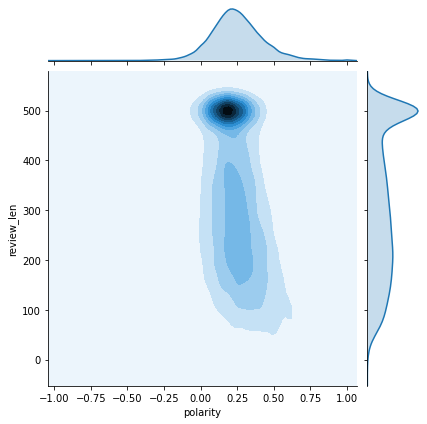

In [176]:
sns.jointplot(x = 'polarity', y = 'review_len', data = df, kind = 'kde')

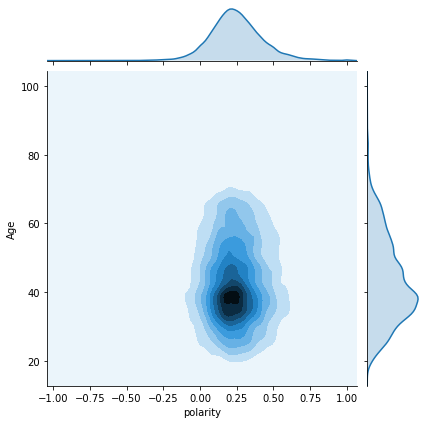

In [177]:
sns.jointplot(x = 'polarity', y = 'Age', data = df, kind = 'kde')